Compute IG cumul

In [2]:
import netCDF4
from netCDF4 import Dataset, num2date
import warnings
warnings.filterwarnings("ignore")
import datetime
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pylab as plt
import numpy as np
from carto import scale_bar

In [4]:
yi = 1979
yf = 1979
#########################################################

for year in range(yi,yf+1):
    print('Calcul pour: '+str(year))
    # ouverture des fichiers pour une année 
    # precipitation cumulée sur 24h
    file = 'K:/PROJETS/PROJET_FIRE_INDEX/ERA5_SR_Netcdf/ERA5_SR_QC_SNOW_New_'+str(year)+'_from_4_to_8.nc'
    sr = xr.open_mfdataset(file)

Calcul pour: 1979


Quick plot

In [20]:
def plot_background(ax):
    ax.set_extent([-90,-50,40,60])
    ax.coastlines(resolution='110m');
    ax.add_feature(cfeature.OCEAN.with_scale('50m'))      
    ax.add_feature(cfeature.LAND.with_scale('50m'))       
    ax.add_feature(cfeature.LAKES.with_scale('50m'))     
    ax.add_feature(cfeature.BORDERS.with_scale('50m'))    
    ax.add_feature(cfeature.RIVERS.with_scale('50m'))    
    coast = cfeature.NaturalEarthFeature(category='physical', scale='10m',    
                        facecolor='none', name='coastline')
    ax.add_feature(coast, edgecolor='black')
    
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')

    ax.add_feature(states_provinces, edgecolor='gray')

   
    return ax

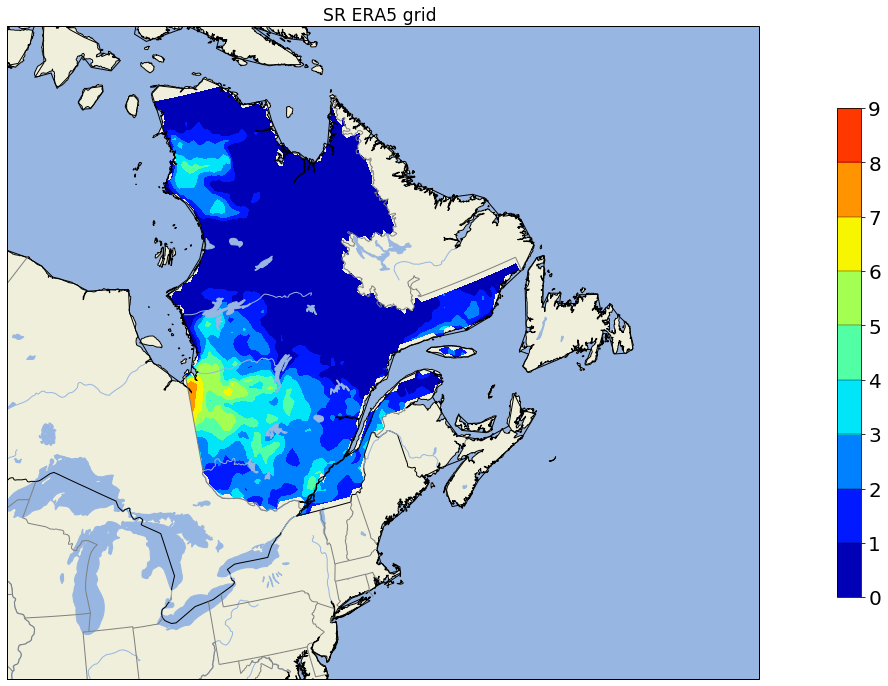

In [30]:
fig = plt.figure(figsize=(28,12))
from matplotlib.gridspec import GridSpec
cmap0=plt.cm.jet
cmap0.set_under('darkblue') 
cmap0.set_over('darkred')

ax = plt.subplot(111, projection=ccrs.LambertConformal())
plot_background(ax)
mm = ax.contourf(sr.lon,\
                   sr.lat,\
                   sr.SR.isel(time=100).values,\
                   vmin=0,\
                   vmax=10, \
                   transform=ccrs.PlateCarree(),\
                   levels=np.arange(0, 10, 1.0),\
                   cmap=cmap0 )

string_title=u'SR ERA5 grid '
plt.title(string_title, size='xx-large')
cbar = plt.colorbar(mm,  shrink=0.75, drawedges='True', ticks=np.arange(0, 10.1, 1.), extend='both') 

cbar.ax.tick_params(labelsize=20) 


Compute of cumul IG

In [81]:
yi = 1979
yf = 2019
#########################################################

for year in range(yi,yf+1):
    print('Calcul pour: '+str(year))
    # ouverture des fichiers pour une année 
    # precipitation cumulée sur 24h
    file = 'K:/PROJETS/PROJET_FIRE_INDEX/ERA5_SR_Netcdf/ERA5_SR_QC_SNOW_New_'+str(year)+'_from_4_to_8.nc'
    sr = xr.open_mfdataset(file)
    nt = sr["time"].shape[0]
    tmp = []
    for t in range(1, nt+1):   
        result = sr["SR"][:t].sum('time').values
        tmp.append(result)
    data_set = xr.Dataset( coords={'lon': ([ 'lon'], sr.lon),
                                     'lat': (['lat',], sr.lat),
                                     'time': sr.time.values})
    data_set["IG_Cumul"] = (['time','lat', 'lon'],  tmp)
    data_set.to_netcdf('K:/PROJETS/PROJET_FIRE_INDEX/ERA5_SR_Netcdf/ERA5_SR_QC_SNOW_Cumul_daily_'+str(year)+'_from_4_to_8.nc')
    

Calcul pour: 1979
Calcul pour: 1980
Calcul pour: 1981
Calcul pour: 1982
Calcul pour: 1983
Calcul pour: 1984
Calcul pour: 1985
Calcul pour: 1986
Calcul pour: 1987
Calcul pour: 1988
Calcul pour: 1989
Calcul pour: 1990
Calcul pour: 1991
Calcul pour: 1992
Calcul pour: 1993
Calcul pour: 1994
Calcul pour: 1995
Calcul pour: 1996
Calcul pour: 1997
Calcul pour: 1998
Calcul pour: 1999
Calcul pour: 2000
Calcul pour: 2001
Calcul pour: 2002
Calcul pour: 2003
Calcul pour: 2004
Calcul pour: 2005
Calcul pour: 2006
Calcul pour: 2007
Calcul pour: 2008
Calcul pour: 2009
Calcul pour: 2010
Calcul pour: 2011
Calcul pour: 2012
Calcul pour: 2013
Calcul pour: 2014
Calcul pour: 2015
Calcul pour: 2016
Calcul pour: 2017
Calcul pour: 2018
Calcul pour: 2019
